# matrix fold of gate Y adapted to ibmq4

In [1]:
# Checking the version of PYTHON; we only support > 3.5
import sys
sys.path.append('../../../Transferências/qiskit-sdk-py-master')

if sys.version_info < (3,5):
    raise Exception('Please use Python version 3.5 or greater.')

import qiskit
import numpy

# Import the QISKit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, QuantumProgram, Result
from qiskit import available_backends, execute, register, get_backend
import getpass, time
import Qconfig
from qiskit import compile


# import basic plot tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state

#information of API
from IBMQuantumExperience import IBMQuantumExperience

# Import tomography tools
import qiskit.tools.qcvv.tomography as tomo

# Aditional packages
from qiskit.tools.qi.qi import *

In [2]:
api = IBMQuantumExperience(Qconfig.APItoken)
myCredits = api.get_my_credits()

print(myCredits)

# set the APIToken and API url
try:
    register(Qconfig.APItoken,Qconfig.config['url'])

    print('\nYou have access to great power!')
    print(available_backends({'local': False, 'simulator': False}))
    print('Available simulators:')
    print(available_backends({'simulator':True}))
except: 
    print('Something went wrong.\nDid you enter a correct token?')

{'maxUserType': 15, 'promotional': 0, 'remaining': 15}

You have access to great power!
['ibmq_16_rueschlikon', 'ibmq_5_tenerife', 'ibmq_5_yorktown']
Available simulators:
['ibmq_qasm_simulator', 'local_qasm_simulator', 'local_statevector_simulator', 'local_unitary_simulator']


In [3]:
# Creating Programs
# create QuantumProgram object instance.
qp = QuantumProgram()

# Creating Registers
# create Quantum Register called "qr" with 3 qubits 
qr = qp.create_quantum_register('qr', 4)
# create Classical Register  called "cr" with 3 bits
cr = qp.create_classical_register('cr', 4)

# Creating Circuits
# create Quantum Circuit called "qc" involving your Quantum Register "qr"
# and your Classical Register "cr"
qc = qp.create_circuit('Circuit', [qr], [cr])

In [4]:
# Get the components.

# get the circuit by Name
circuit = qp.get_circuit('Circuit')

# get the Quantum Register by Name
quantum_r = qp.get_quantum_register('qr')

# get the Classical Register by Name
classical_r = qp.get_classical_register('cr')

In [5]:
#preparing qubits
qc.h(qr[1])

# the circuit we want:
qc.h(qr[0])
qc.cx(qr[0],qr[3])
qc.cx(qr[3],qr[2])
qc.t(qr[3])
qc.tdg(qr[2])
qc.cx(qr[0],qr[3])
qc.cx(qr[3],qr[2])
qc.tdg(qr[0])
qc.t(qr[2])
qc.cx(qr[0],qr[2])
qc.h(qr[0])
qc.tdg(qr[1])
qc.tdg(qr[0])
qc.cx(qr[1],qr[0])
qc.t(qr[0])
qc.cx(qr[1],qr[0])
qc.h(qr[0])
qc.cx(qr[0],qr[2])
qc.tdg(qr[2])
qc.t(qr[0])
qc.cx(qr[3],qr[2])
qc.cx(qr[0],qr[3])
qc.t(qr[2])
qc.tdg(qr[3])
qc.cx(qr[3],qr[2])
qc.cx(qr[0],qr[3])
qc.h(qr[0])
qc.barrier(qr[0])
qc.h(qr[0])
qc.cx(qr[0],qr[3])
qc.cx(qr[3],qr[1])
qc.t(qr[3])
qc.t(qr[1])
qc.cx(qr[0],qr[3])
qc.cx(qr[3],qr[1])
qc.tdg(qr[0])
qc.tdg(qr[1])
qc.cx(qr[0],qr[1])
qc.h(qr[0])
qc.cx(qr[2],qr[0])
qc.tdg(qr[0])
qc.cx(qr[2],qr[0])
qc.t(qr[0])
qc.t(qr[2])
qc.h(qr[0])
qc.cx(qr[0],qr[1])
qc.t(qr[1])
qc.t(qr[0])
qc.cx(qr[3],qr[1])
qc.cx(qr[0],qr[3])
qc.tdg(qr[1])
qc.tdg(qr[3])
qc.cx(qr[3],qr[1])
qc.cx(qr[0],qr[3])
qc.h(qr[0])
qc.h(qr[1])
qc.t(qr[1])
qc.t(qr[3])
qc.t(qr[2])
qc.cx(qr[3],qr[2])
qc.cx(qr[1],qr[3])
qc.cx(qr[2],qr[1])
qc.tdg(qr[3])
qc.t(qr[1])
qc.cx(qr[2],qr[3])
qc.tdg(qr[3])
qc.tdg(qr[2])
qc.cx(qr[1],qr[3])
qc.cx(qr[2],qr[1])
qc.cx(qr[3],qr[2])
qc.h(qr[1])
qc.barrier(qr[0])
qc.h(qr[0])
qc.cx(qr[0],qr[3])
qc.cx(qr[3],qr[2])
qc.tdg(qr[3])
qc.t(qr[2])
qc.cx(qr[0],qr[3])
qc.cx(qr[3],qr[2])
qc.tdg(qr[0])
qc.t(qr[2])
qc.cx(qr[0],qr[2])
qc.h(qr[0])
qc.tdg(qr[1])
qc.tdg(qr[0])
qc.cx(qr[1],qr[0])
qc.t(qr[0])
qc.cx(qr[1],qr[0])
qc.h(qr[0])
qc.cx(qr[0],qr[2])
qc.tdg(qr[2])
qc.t(qr[0])
qc.cx(qr[3],qr[2])
qc.cx(qr[0],qr[3])
qc.tdg(qr[2])
qc.t(qr[3])
qc.cx(qr[3],qr[2])
qc.cx(qr[0],qr[3])
qc.h(qr[0])
qc.barrier(qr[0])
qc.h(qr[0])
qc.cx(qr[0],qr[3])
qc.cx(qr[3],qr[1])
qc.tdg(qr[3])
qc.tdg(qr[1])
qc.cx(qr[0],qr[3])
qc.cx(qr[3],qr[1])
qc.tdg(qr[0])
qc.tdg(qr[1])
qc.cx(qr[0],qr[1])
qc.h(qr[0])
qc.cx(qr[2],qr[0])
qc.tdg(qr[0])
qc.cx(qr[2],qr[0])
qc.t(qr[0])
qc.t(qr[2])
qc.h(qr[0])
qc.cx(qr[0],qr[1])
qc.t(qr[1])
qc.t(qr[0])
qc.cx(qr[3],qr[1])
qc.cx(qr[0],qr[3])
qc.t(qr[1])
qc.t(qr[3])
qc.cx(qr[3],qr[1])
qc.cx(qr[0],qr[3])
qc.h(qr[0])
qc.h(qr[1])
qc.t(qr[1])
qc.tdg(qr[3])
qc.t(qr[2])
qc.cx(qr[3],qr[2])
qc.cx(qr[1],qr[3])
qc.cx(qr[2],qr[1])
qc.t(qr[3])
qc.tdg(qr[1])
qc.cx(qr[2],qr[3])
qc.tdg(qr[3])
qc.t(qr[2])
qc.cx(qr[1],qr[3])
qc.cx(qr[2],qr[1])
qc.cx(qr[3],qr[2])
qc.h(qr[1])

# don't forget update the number of qubits and bits registered


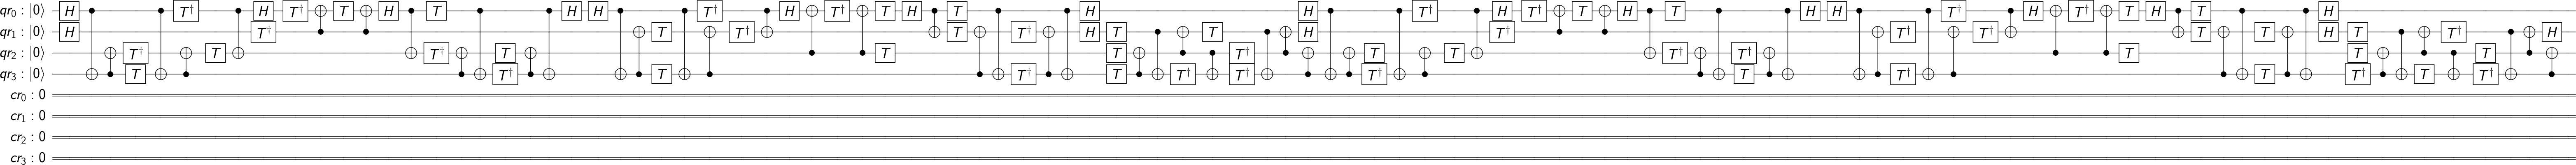

In [6]:
circuit_drawer(qc)

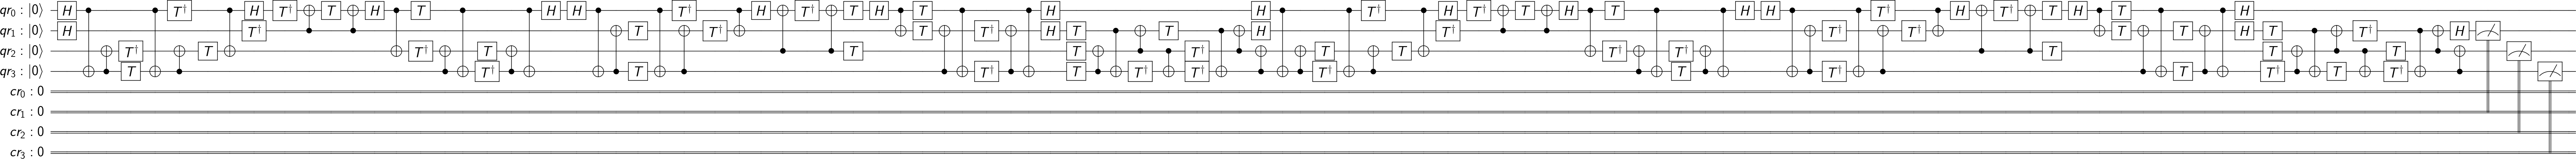

In [7]:
qc.measure(qr[1],cr[1])
qc.measure(qr[2],cr[2])
qc.measure(qr[3],cr[3])

circuit_drawer(qc)

In [8]:
qp.get_circuit_names()

['Circuit']

Status @ 0 seconds
{'status': <JobStatus.RUNNING: 'job is actively running'>, 'status_msg': None}
{'status': <JobStatus.DONE: 'job has successfully run'>, 'status_msg': None}
{'0000': 495, '0010': 529}


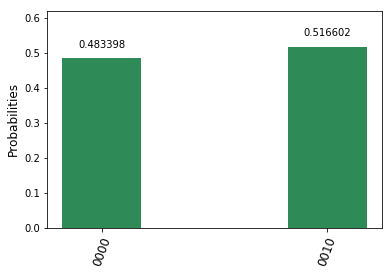

In [9]:
#other way complire and run:
job = execute(qc, backend='local_qasm_simulator', shots=1024, max_credits=3)

lapse = 0
interval = 5
while not job.done:
    print('Status @ {} seconds'.format(interval * lapse))
    print(job.status)
    time.sleep(interval)
    lapse += 1
print(job.status)

print(job.result().get_counts(qc))
plot_histogram(job.result().get_counts(qc))

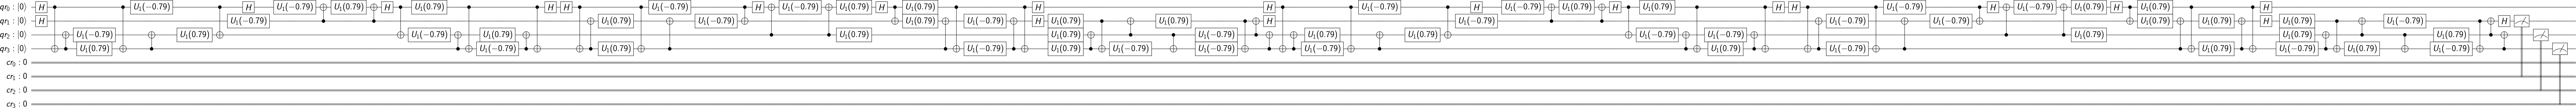

In [10]:
#the circuit running is not the one we write
qobj = compile(qc, backend='local_qasm_simulator')

qasm_str = qp.get_compiled_qasm(qobj, 'Circuit')

qasm_circ = qiskit.load_qasm_string(qasm_str);
circuit_drawer(qasm_circ)

In [11]:
print(qasm_str)

OPENQASM 2.0;
include "qelib1.inc";
qreg qr[4];
creg cr[4];
h qr[1];
h qr[0];
cx qr[0],qr[3];
cx qr[3],qr[2];
u1(0.785398163397448) qr[3];
u1(-0.785398163397448) qr[2];
cx qr[0],qr[3];
cx qr[3],qr[2];
u1(-0.785398163397448) qr[0];
u1(0.785398163397448) qr[2];
cx qr[0],qr[2];
h qr[0];
u1(-0.785398163397448) qr[1];
u1(-0.785398163397448) qr[0];
cx qr[1],qr[0];
u1(0.785398163397448) qr[0];
cx qr[1],qr[0];
h qr[0];
cx qr[0],qr[2];
u1(-0.785398163397448) qr[2];
u1(0.785398163397448) qr[0];
cx qr[3],qr[2];
cx qr[0],qr[3];
u1(0.785398163397448) qr[2];
u1(-0.785398163397448) qr[3];
cx qr[3],qr[2];
cx qr[0],qr[3];
h qr[0];
barrier qr[0];
h qr[0];
cx qr[0],qr[3];
cx qr[3],qr[1];
u1(0.785398163397448) qr[3];
u1(0.785398163397448) qr[1];
cx qr[0],qr[3];
cx qr[3],qr[1];
u1(-0.785398163397448) qr[0];
u1(-0.785398163397448) qr[1];
cx qr[0],qr[1];
h qr[0];
cx qr[2],qr[0];
u1(-0.785398163397448) qr[0];
cx qr[2],qr[0];
u1(0.785398163397448) qr[0];
u1(0.785398163397448) qr[2];
h qr[0];
cx qr[0],qr[1];
u1

# Running on a real device

In [12]:
def lowest_pending_jobs():
    """Returns the backend with lowest pending jobs."""
    list_of_backends = available_backends(
        {'local': False, 'simulator': False})
    device_status = [get_backend(backend).status
                     for backend in list_of_backends]

    best = min([x for x in device_status if x['operational'] is True],
               key=lambda x: x['pending_jobs'])
    return best['name']

backend = lowest_pending_jobs()
print("The best backend is " + backend)

The best backend is ibmqx5


In [13]:
backend= 'ibmqx4'
api.backend_status(backend)

{'available': True, 'backend': 'ibmqx4', 'pending_jobs': 516}

In [14]:
api.backend_calibration(backend)

{'backend': 'ibmqx4',
 'lastUpdateDate': '2018-08-17T10:00:20.000Z',
 'multiQubitGates': [{'gateError': {'date': '2018-08-17T10:00:20Z',
    'value': 0.04384724580129881},
   'name': 'CX1_0',
   'qubits': [1, 0],
   'type': 'CX'},
  {'gateError': {'date': '2018-08-17T10:00:20Z', 'value': 0.05606104489580127},
   'name': 'CX2_0',
   'qubits': [2, 0],
   'type': 'CX'},
  {'gateError': {'date': '2018-08-17T10:00:20Z',
    'value': 0.036173068020120436},
   'name': 'CX2_1',
   'qubits': [2, 1],
   'type': 'CX'},
  {'gateError': {'date': '2018-08-17T10:00:20Z',
    'value': 0.056823634317806654},
   'name': 'CX3_2',
   'qubits': [3, 2],
   'type': 'CX'},
  {'gateError': {'date': '2018-08-17T10:00:20Z', 'value': 0.0433663907690201},
   'name': 'CX3_4',
   'qubits': [3, 4],
   'type': 'CX'},
  {'gateError': {'date': '2018-08-17T10:00:20Z', 'value': 0.05779480980995047},
   'name': 'CX4_2',
   'qubits': [4, 2],
   'type': 'CX'}],
 'qubits': [{'gateError': {'date': '2018-08-17T10:00:20Z',
    '

In [15]:
api.backend_parameters(backend)

{'backend': 'ibmqx4',
 'fridgeParameters': {'Temperature': {'date': '-', 'unit': '-', 'value': []},
  'cooldownDate': '2017-09-07'},
 'lastUpdateDate': '2018-08-17T10:00:20.000Z',
 'qubits': [{'T1': {'date': '2018-08-17T10:00:20Z',
    'unit': 'µs',
    'value': 8.8},
   'T2': {'date': '2018-08-17T10:00:20Z', 'unit': 'µs', 'value': 15.7},
   'buffer': {'date': '2018-08-17T10:00:20Z', 'unit': 'ns', 'value': 10},
   'frequency': {'date': '2018-08-17T10:00:20Z',
    'unit': 'GHz',
    'value': 5.24985},
   'gateTime': {'date': '2018-08-17T10:00:20Z', 'unit': 'ns', 'value': 60},
   'name': 'Q0'},
  {'T1': {'date': '2018-08-17T10:00:20Z', 'unit': 'µs', 'value': 42.5},
   'T2': {'date': '2018-08-17T10:00:20Z', 'unit': 'µs', 'value': 25.7},
   'buffer': {'date': '2018-08-17T10:00:20Z', 'unit': 'ns', 'value': 10},
   'frequency': {'date': '2018-08-17T10:00:20Z',
    'unit': 'GHz',
    'value': 5.2958},
   'gateTime': {'date': '2018-08-17T10:00:20Z', 'unit': 'ns', 'value': 60},
   'name': 'Q1'}

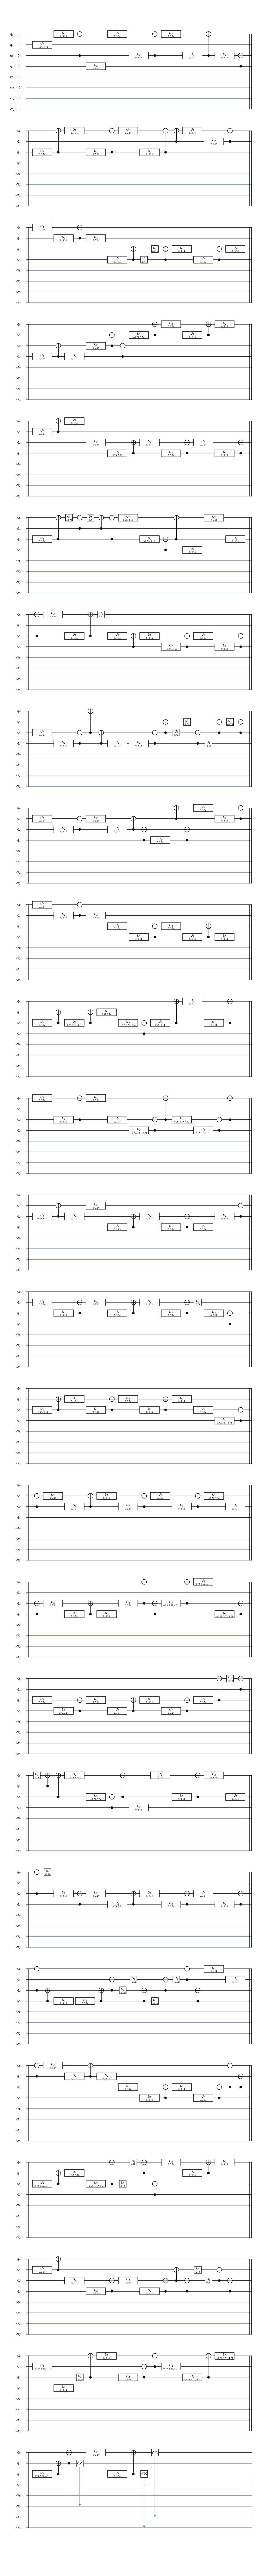

In [16]:
qobj = compile(qc, backend=backend)

qs_str = qp.get_compiled_qasm(qobj, 'Circuit')

qs_circ = qiskit.load_qasm_string(qs_str);
circuit_drawer(qs_circ)

In [17]:
print(qs_str)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
creg cr[4];
u2(-0.785398163397448,3.14159265358979) q[1];
u2(0,3.14159265358979) q[0];
cx q[2],q[0];
u2(0,3.14159265358979) q[3];
u2(0,3.14159265358979) q[0];
u2(0,3.14159265358979) q[2];
cx q[2],q[0];
u2(0,3.14159265358979) q[0];
u2(0,3.14159265358979) q[2];
cx q[2],q[0];
u2(0,3.14159265358979) q[2];
cx q[3],q[2];
u2(0,3.14159265358979) q[2];
cx q[2],q[0];
u2(0,3.14159265358979) q[0];
u2(0,3.14159265358979) q[2];
cx q[2],q[0];
u2(0,3.14159265358979) q[0];
u2(0,3.14159265358979) q[2];
cx q[2],q[0];
cx q[1],q[0];
u2(0,3.14159265358979) q[0];
u2(0,3.14159265358979) q[1];
cx q[1],q[0];
u2(0,3.14159265358979) q[0];
u2(0,3.14159265358979) q[1];
cx q[1],q[0];
u2(0,3.14159265358979) q[1];
u2(0,3.14159265358979) q[3];
cx q[3],q[2];
u1(0.785398163397448) q[3];
u1(-0.785398163397448) q[2];
cx q[3],q[2];
u2(0,3.14159265358979) q[2];
u2(0,3.14159265358979) q[3];
cx q[3],q[2];
u2(0,3.14159265358979) q[2];
u2(0,3.14159265358979) q[3];
cx q[3],q[2];
u2(0

In [18]:
shots=1024
max_credits=3
job_exp = execute(qc, backend=backend, shots=shots, max_credits=max_credits)

lapse = 0
interval = 10
while not job_exp.done:
    print('Status @ {} seconds'.format(interval * lapse))
    print(job_exp.status)
    time.sleep(interval)
    lapse += 1
print(job_exp.status)

Status @ 0 seconds
{'job_id': None, 'status': <JobStatus.INITIALIZING: 'job is being initialized'>, 'status_msg': 'Job is initializing. Please, wait a moment.'}
Status @ 10 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 517}
Status @ 20 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 517}
Status @ 30 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 516}
Status @ 40 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 515}
Status @ 50 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 515}
Status @ 60 seconds
{'job_id': '5b76a50

{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 505}
Status @ 520 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 505}
Status @ 530 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 505}
Status @ 540 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 504}
Status @ 550 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 503}
Status @ 560 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 504}
Status @ 570 seconds
{'job_id': '5b76a5043f516200393c8e

{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 489}
Status @ 1030 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 489}
Status @ 1040 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 489}
Status @ 1050 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 488}
Status @ 1060 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 488}
Status @ 1070 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 488}
Status @ 1080 seconds
{'job_id': '5b76a5043f516200

Status @ 1530 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 477}
Status @ 1540 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 477}
Status @ 1550 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 476}
Status @ 1560 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 477}
Status @ 1570 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 477}
Status @ 1580 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 477}
Status @ 1590 seconds
{'job_

Status @ 2040 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 465}
Status @ 2050 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 464}
Status @ 2060 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 462}
Status @ 2070 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 462}
Status @ 2080 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.RUNNING: 'job is actively running'>, 'status_msg': 'job is actively running'}
Status @ 2090 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 462}
Status @ 2100 seconds
{'job_id

Status @ 2550 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.RUNNING: 'job is actively running'>, 'status_msg': 'job is actively running'}
Status @ 2560 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 486}
Status @ 2570 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 486}
Status @ 2580 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 486}
Status @ 2590 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 485}
Status @ 2600 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 485}
Status @ 2610 seconds
{'job_id

Status @ 3060 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 475}
Status @ 3070 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 475}
Status @ 3080 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 475}
Status @ 3090 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 475}
Status @ 3100 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 475}
Status @ 3110 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 475}
Status @ 3120 seconds
{'job_

Status @ 3570 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 461}
Status @ 3580 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 461}
Status @ 3590 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 460}
Status @ 3600 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 460}
Status @ 3610 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 460}
Status @ 3620 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 459}
Status @ 3630 seconds
{'job_

Status @ 4080 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 450}
Status @ 4090 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 450}
Status @ 4100 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 449}
Status @ 4110 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 449}
Status @ 4120 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 449}
Status @ 4130 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 449}
Status @ 4140 seconds
{'job_

Status @ 4590 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 437}
Status @ 4600 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 436}
Status @ 4610 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 2}
Status @ 4620 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 3}
Status @ 4630 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 4}
Status @ 4640 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 470}
Status @ 4650 seconds
{'job_id': '

Status @ 5100 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 461}
Status @ 5110 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 460}
Status @ 5120 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 460}
Status @ 5130 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 458}
Status @ 5140 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 458}
Status @ 5150 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 458}
Status @ 5160 seconds
{'job_

Status @ 5610 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 445}
Status @ 5620 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 444}
Status @ 5630 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 445}
Status @ 5640 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 442}
Status @ 5650 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 442}
Status @ 5660 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 442}
Status @ 5670 seconds
{'job_

Status @ 6120 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 432}
Status @ 6130 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 431}
Status @ 6140 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 431}
Status @ 6150 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 431}
Status @ 6160 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 431}
Status @ 6170 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 431}
Status @ 6180 seconds
{'job_

Status @ 6630 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 419}
Status @ 6640 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 418}
Status @ 6650 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 419}
Status @ 6660 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.RUNNING: 'job is actively running'>, 'status_msg': 'job is actively running'}
Status @ 6670 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 419}
Status @ 6680 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 419}
Status @ 6690 seconds
{'job_id

Status @ 7140 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 443}
Status @ 7150 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 442}
Status @ 7160 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 442}
Status @ 7170 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 441}
Status @ 7180 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 441}
Status @ 7190 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 441}
Status @ 7200 seconds
{'job_

Status @ 7650 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 428}
Status @ 7660 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 428}
Status @ 7670 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 428}
Status @ 7680 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 427}
Status @ 7690 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 427}
Status @ 7700 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 425}
Status @ 7710 seconds
{'job_

Status @ 8160 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 418}
Status @ 8170 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 417}
Status @ 8180 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 418}
Status @ 8190 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 416}
Status @ 8200 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 416}
Status @ 8210 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 416}
Status @ 8220 seconds
{'job_

Status @ 8670 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 406}
Status @ 8680 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 406}
Status @ 8690 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 406}
Status @ 8700 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 406}
Status @ 8710 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 406}
Status @ 8720 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 406}
Status @ 8730 seconds
{'job_

Status @ 9180 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 2}
Status @ 9190 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 2}
Status @ 9200 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 2}
Status @ 9210 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 2}
Status @ 9220 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 1}
Status @ 9230 seconds
{'job_id': '5b76a5043f516200393c8eb1', 'status': <JobStatus.QUEUED: 'job is queued'>, 'status_msg': 'job is queued', 'queue_position': 1}
Status @ 9240 seconds
{'job_id': '5b76a5

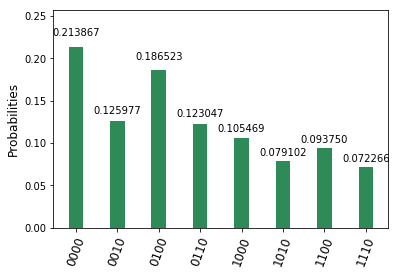

In [19]:
plot_histogram(job_exp.result().get_counts(qc))

In [20]:
job_exp.result().get_data('Circuit')

{'counts': {'0000': 219,
  '0010': 129,
  '0100': 191,
  '0110': 126,
  '1000': 108,
  '1010': 81,
  '1100': 96,
  '1110': 74},
 'date': '2018-08-17T14:17:28.378Z',
 'time': 25.508753061294556}